# LOAD DATA

In [9]:
import pandas as pd
import numpy as np

In [10]:
#padelpy + rdkit descriptors
data = pd.read_csv('df_merg_eda.csv').drop(columns = ['Unnamed: 0.1'])
data.head(3)

,BindingDB Reactant_set_id,Ligand SMILES,IC50 (nM),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,233666,O=S(=O)(CC#N)N1CCC[C@@H](C1)Nc1ncccc1-c1cnc2[n...,0.00149,0,-2.5476,6.490266,47.1477,56.553067,15,17,...,0,1,0,0,0,0,0,0,0,0
1,233696,CC(C)CS(=O)(=O)N1CCC[C@@H](C1)Nc1nc(ncc1-c1cnc...,0.00188,0,-2.1189,4.489737,69.7054,69.911411,15,17,...,0,1,1,0,0,0,0,0,0,0
2,233693,CC(C)CS(=O)(=O)N1CCC[C@@H](C1)Nc1ncncc1-c1cnc2...,0.00196,0,-1.7960,3.225616,55.3671,62.313825,15,17,...,0,1,0,0,0,0,0,0,0,0


In [11]:
# modred descriptors
asd = pd.read_csv('mordred_des_final.csv').drop(columns = ['Unnamed: 0','ABC','ABCGG'])
asd.head(3)

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,36.415496,2.431595,4.840086,36.415496,1.300553,4.272560,4.717967,0.168499,...,10.294617,77.127622,397.132094,8.449619,2116,44,150.0,177.0,8.090278,6.125000
1,0,0,40.877199,2.458938,4.903875,40.877199,1.238703,4.432955,5.009725,0.151810,...,10.520914,83.116976,493.156594,8.219277,3195,53,180.0,211.0,11.875000,6.875000
2,0,0,37.086666,2.432467,4.843486,37.086666,1.278851,4.306603,4.805172,0.165696,...,10.327938,78.307604,415.179044,7.688501,2339,45,156.0,183.0,8.951389,6.208333


In [12]:
#  Finding repeated features in the generated descriptors based on the name
lst_repeat = []
for i in data.columns:
    if i in asd.columns:
        lst_repeat.append(i)
len(lst_repeat)        

685

685 features are same in both dataframe

##### Creating final data frame

In [13]:
a = pd.concat([data.drop(columns = lst_repeat),asd],axis = 1)
a.head(2)

,BindingDB Reactant_set_id,Ligand SMILES,IC50 (nM),ALogP,ALogp2,AMR,naAromAtom,ATS0e,ATS1e,ATS2e,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,233666,O=S(=O)(CC#N)N1CCC[C@@H](C1)Nc1ncccc1-c1cnc2[n...,0.00149,-2.5476,6.490266,47.1477,15,370.238837,396.318412,700.378874,...,10.294617,77.127622,397.132094,8.449619,2116,44,150.0,177.0,8.090278,6.125
1,233696,CC(C)CS(=O)(=O)N1CCC[C@@H](C1)Nc1nc(ncc1-c1cnc...,0.00188,-2.1189,4.489737,69.7054,15,474.514862,499.879792,915.855870,...,10.520914,83.116976,493.156594,8.219277,3195,53,180.0,211.0,11.875000,6.875


In [14]:
a.shape

(5603, 2796)

In [15]:
a['pic50'] = np.log10(a['IC50 (nM)'])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
# checking null values
a.isnull().sum()

BindingDB Reactant_set_id    0
Ligand SMILES                0
IC50 (nM)                    0
ALogP                        1
ALogp2                       1
                            ..
Zagreb1                      0
Zagreb2                      0
mZagreb1                     5
mZagreb2                     0
pic50                        0
Length: 2797, dtype: int64

In [17]:
null_column = []
for i in a.columns:
    if a[i].isnull().sum()/5603 > 0.5:
        #print(i,'--',a[i].isnull().sum())
        null_column.append(i)
print('Total of',len(null_column),'columns have more than 50 % null value')        

Total of 374 columns have more than 50 % null value


In [18]:
a = a.drop(columns = null_column)
a.shape

(5603, 2423)

# REMOVE FIXED VARIABLES

In [19]:
from sklearn.feature_selection import VarianceThreshold

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
# the data frame contains infinity values
a.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
ax = a.drop(columns = 'Ligand SMILES')

In [22]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(ax)
var_thres.get_support()
ax.columns[var_thres.get_support()]
constsnt_columns=[column for column in ax.columns
                 if column not in ax.columns[var_thres.get_support()]]
for feature in constsnt_columns:
    print(feature)
l=ax.drop(constsnt_columns,axis=1)
l

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


nBondsQ
nHsNH3p
nHssNH2p
nHsssNHp
nHmisc
nsLi
nssBe
nssssBem
nsBH2
nssBH
nssssBm
nddC
nsNH3p
nssNH2p
nsssNHp
nddsN
nssssNp
naOm
nsSiH3
nssSiH2
nsssSiH
nssssSi
nsPH2
nssPH
nsssP
nddsP
nsssssP
nssssssS
nSm
nsGeH3
nssGeH2
nsssGeH
nssssGe
nsAsH2
nssAsH
nsssAs
ndsssAs
nddsAs
nsssssAs
nsSeH
ndSe
nssSe
naaSe
ndssSe
nssssssSe
nddssSe
nsSnH3
nssSnH2
nsssSnH
nssssSn
nsPbH3
nssPbH2
nsssPbH
nssssPb
SHsNH3p
SHssNH2p
SHsssNHp
SHmisc
SssssBem
SsBH2
SssssBm
SsNH3p
SssNH2p
SsssNHp
SssssNp
SaOm
SddsP
SssssssS
SSm
SdsssAs
SddsAs
SssssssSe
minHsNH3p
minHssNH2p
minHsssNHp
minHmisc
minsLi
minssBe
minssssBem
minsBH2
minssBH
minssssBm
minddC
minsNH3p
minssNH2p
minsssNHp
minddsN
minssssNp
minaOm
minsSiH3
minssSiH2
minsssSiH
minssssSi
minsPH2
minssPH
minsssP
minddsP
minsssssP
minssssssS
minSm
minsGeH3
minssGeH2
minsssGeH
minssssGe
minsAsH2
minssAsH
minsssAs
mindsssAs
minddsAs
minsssssAs
minsSeH
mindSe
minssSe
minaaSe
mindssSe
minssssssSe
minddssSe
minsSnH3
minssSnH2
minsssSnH
minssssSn
minsPbH3
minssPbH2
minsss

,BindingDB Reactant_set_id,IC50 (nM),ALogP,ALogp2,AMR,naAromAtom,ATS0e,ATS1e,ATS2e,ATS3e,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,pic50
0,233666,0.001490,-2.5476,6.490266,47.1477,15,370.238837,396.318412,700.378874,928.733930,...,77.127622,397.132094,8.449619,2116,44,150.0,177.0,8.090278,6.125000,-2.826814
1,233696,0.001880,-2.1189,4.489737,69.7054,15,474.514862,499.879792,915.855870,1212.302232,...,83.116976,493.156594,8.219277,3195,53,180.0,211.0,11.875000,6.875000,-2.725842
2,233693,0.001960,-1.7960,3.225616,55.3671,15,418.090137,447.794928,809.347458,1067.892796,...,78.307604,415.179044,7.688501,2339,45,156.0,183.0,8.951389,6.208333,-2.707744
3,233721,0.002185,-0.3820,0.145924,95.0194,15,585.335517,630.228184,1174.063106,1568.820330,...,88.761450,541.294742,7.029802,4819,60,208.0,243.0,12.236111,7.944444,-2.660549
4,233656,0.002400,-0.8127,0.660481,60.2261,15,443.124925,474.227924,861.376110,1161.973198,...,79.608224,428.199445,7.382749,2564,46,164.0,191.0,9.902778,6.250000,-2.619789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,50269571,1.200000,-1.8548,3.440283,32.9644,17,341.078880,365.631620,632.821604,853.555968,...,73.862633,338.154289,7.685325,1450,38,134.0,158.0,6.638889,5.444444,0.079181
5599,50269568,1.400000,-1.0358,1.072882,14.1786,23,318.177156,338.809248,533.498652,690.663224,...,75.099127,347.107005,8.677675,1633,40,140.0,165.0,7.500000,5.611111,0.146128
5600,50269570,2.100000,-1.9534,3.815772,19.1201,23,345.702640,359.299900,567.763904,732.606412,...,78.711949,390.089558,9.287847,2190,47,156.0,185.0,9.472222,6.250000,0.322219
5601,50269566,3.700000,-0.8085,0.653672,51.5535,28,536.193345,565.030088,968.723254,1195.090406,...,92.968861,562.189368,8.267491,6246,62,212.0,249.0,12.034722,8.847222,0.568202


In [23]:
l.head()

,BindingDB Reactant_set_id,IC50 (nM),ALogP,ALogp2,AMR,naAromAtom,ATS0e,ATS1e,ATS2e,ATS3e,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,pic50
0,233666,0.001490,-2.5476,6.490266,47.1477,15,370.238837,396.318412,700.378874,928.733930,...,77.127622,397.132094,8.449619,2116,44,150.0,177.0,8.090278,6.125000,-2.826814
1,233696,0.001880,-2.1189,4.489737,69.7054,15,474.514862,499.879792,915.855870,1212.302232,...,83.116976,493.156594,8.219277,3195,53,180.0,211.0,11.875000,6.875000,-2.725842
2,233693,0.001960,-1.7960,3.225616,55.3671,15,418.090137,447.794928,809.347458,1067.892796,...,78.307604,415.179044,7.688501,2339,45,156.0,183.0,8.951389,6.208333,-2.707744
3,233721,0.002185,-0.3820,0.145924,95.0194,15,585.335517,630.228184,1174.063106,1568.820330,...,88.761450,541.294742,7.029802,4819,60,208.0,243.0,12.236111,7.944444,-2.660549
4,233656,0.002400,-0.8127,0.660481,60.2261,15,443.124925,474.227924,861.376110,1161.973198,...,79.608224,428.199445,7.382749,2564,46,164.0,191.0,9.902778,6.250000,-2.619789


# REMOVE CORRELATED FEATURE

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()

In [25]:
# Min max scaling
min_max=MinMaxScaler()
a_minmaxscaled=pd.DataFrame(min_max.fit_transform(ax.drop(columns = ['IC50 (nM)','BindingDB Reactant_set_id'])),columns=ax.drop(columns = ['IC50 (nM)','BindingDB Reactant_set_id']).columns)
a_minmaxscaled.head(3)

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,ALogP,ALogp2,AMR,naAromAtom,ATS0e,ATS1e,ATS2e,ATS3e,ATS4e,ATS5e,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,pic50
0,0.327997,0.243590,0.195517,0.416667,0.205112,0.213238,0.222485,0.235325,0.213770,0.208052,...,0.369965,0.239659,0.459497,2.917459e-07,0.252427,0.263158,0.274286,0.265401,0.223469,0.000000
1,0.381785,0.168507,0.303220,0.416667,0.316698,0.318627,0.339485,0.355138,0.335320,0.307959,...,0.440309,0.346667,0.417504,4.630157e-07,0.339806,0.361842,0.371429,0.460602,0.278571,0.014791
2,0.422298,0.121063,0.234761,0.416667,0.256318,0.265623,0.281653,0.294122,0.296283,0.264786,...,0.383823,0.259770,0.320738,3.271427e-07,0.262136,0.282895,0.291429,0.309814,0.229592,0.017442


In [26]:
# Correlation
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation(ax,0.8)
len(set(corr_features))
corr_a=ax.drop(corr_features,axis=1)
corr_a

,BindingDB Reactant_set_id,IC50 (nM),ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex,pic50
0,233666,0.001490,-2.5476,6.490266,47.1477,15,370.238837,7.877422,3.442509,0.124482,...,0.045612,0.029038,0.020919,0.015312,0.012477,0.010783,0.007596,0.007229,1.000000,-2.826814
1,233696,0.001880,-2.1189,4.489737,69.7054,15,474.514862,7.908581,5.278941,0.440192,...,0.053197,0.035032,0.028413,0.021974,0.013611,0.014420,0.013035,0.007791,1.000000,-2.725842
2,233693,0.001960,-1.7960,3.225616,55.3671,15,418.090137,7.742410,3.659352,0.217172,...,0.050154,0.030694,0.021253,0.016138,0.012553,0.011232,0.008482,0.008446,1.000000,-2.707744
3,233721,0.002185,-0.3820,0.145924,95.0194,15,585.335517,7.601760,4.424673,0.334969,...,0.038657,0.038641,0.024759,0.018167,0.011940,0.010313,0.009961,0.007529,1.000000,-2.660549
4,233656,0.002400,-0.8127,0.660481,60.2261,15,443.124925,7.640085,3.558921,0.307451,...,0.057216,0.032139,0.022849,0.017840,0.013423,0.012424,0.009917,0.009697,1.000000,-2.619789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,50269571,1.200000,-1.8548,3.440283,32.9644,17,341.078880,7.751793,3.626382,-0.278607,...,0.033808,0.038488,0.026952,0.012533,0.009268,0.009528,0.010586,0.007069,0.833333,0.079181
5599,50269568,1.400000,-1.0358,1.072882,14.1786,23,318.177156,7.954429,4.028116,-0.445961,...,0.033681,0.042613,0.029167,0.013144,0.011237,0.012276,0.012031,0.009007,1.000000,0.146128
5600,50269570,2.100000,-1.9534,3.815772,19.1201,23,345.702640,8.231015,5.355173,-0.564313,...,0.040632,0.042840,0.030556,0.012626,0.014552,0.014293,0.010918,0.009762,1.000000,0.322219
5601,50269566,3.700000,-0.8085,0.653672,51.5535,28,536.193345,7.885196,6.656903,-0.587649,...,0.035394,0.036640,0.026084,0.013878,0.010747,0.011805,0.008523,0.005274,1.000000,0.568202


In [27]:
# Standardisation
ss_df = pd.DataFrame(ss.fit_transform(corr_a.drop(columns = ['BindingDB Reactant_set_id','IC50 (nM)','pic50'])),columns=corr_a.drop(columns = ['BindingDB Reactant_set_id','IC50 (nM)','pic50']).columns)
ss_df

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1006: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,ATSC2e,ATSC3e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,-1.495156,1.567952,-0.487621,-0.207335,-0.643993,0.356778,-0.441089,0.739239,0.143690,-0.578413,...,0.314970,-0.094527,-1.214273,-0.929507,-0.710938,-0.351851,0.036530,-0.453008,-0.044559,0.815874
1,-1.076813,0.856521,0.803057,-0.207335,0.606903,0.498104,0.555813,1.782294,0.994986,0.204267,...,0.743131,0.721547,-0.260102,0.692341,1.260164,0.088945,1.496004,1.817097,0.193732,0.815874
2,-0.761715,0.406972,-0.017334,-0.207335,-0.069968,-0.255590,-0.323376,1.045472,0.432128,-0.078046,...,0.046905,0.394163,-0.950583,-0.857095,-0.466416,-0.322199,0.216575,-0.083183,0.471444,0.815874
3,0.618123,-0.688234,2.251441,-0.207335,1.936308,-0.893529,0.092076,1.434654,0.607699,-0.213814,...,0.439275,-0.842846,0.314367,-0.098477,0.133735,-0.560266,-0.152099,0.534016,0.082714,0.815874
4,0.197829,-0.505246,0.260682,-0.207335,0.230349,-0.719701,-0.377895,1.343739,0.553126,-0.148627,...,-0.314163,1.153984,-0.720555,-0.511804,0.036992,0.015674,0.695009,0.515615,1.001424,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,-0.819094,0.483312,-1.299143,0.237334,-0.993796,-0.213033,-0.341274,-0.592499,-0.461107,-0.213984,...,-0.633569,-1.364566,0.289977,0.376202,-1.533011,-1.598180,-0.467301,0.794878,-0.112204,-1.202551
5599,-0.019881,-0.358587,-2.374005,1.571339,-1.268525,0.706054,-0.123194,-1.145408,-0.419707,-0.708344,...,-0.060975,-1.378329,0.946606,0.855516,-1.352293,-0.833238,0.635719,1.398187,0.708853,0.815874
5600,-0.915312,0.616844,-2.091269,1.571339,-0.938329,1.960554,0.597196,-1.536425,0.012377,-0.825735,...,0.415495,-0.630348,0.982724,1.156103,-1.505524,0.454285,1.445148,0.933476,1.029245,0.815874
5601,0.201927,-0.507667,-0.235536,2.683010,1.346798,0.392039,1.303836,-1.613524,0.943762,-2.335469,...,0.165805,-1.193943,-0.004176,0.188312,-1.134990,-1.023710,0.446491,-0.066357,-0.872975,0.815874


In [28]:
# creationg dataframe with ic50 pic50 and binding id
dfm = pd.concat([corr_a[['BindingDB Reactant_set_id','IC50 (nM)','pic50']],ss_df],axis = 1)
dfm.head()

,BindingDB Reactant_set_id,IC50 (nM),pic50,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,233666,0.001490,-2.826814,-1.495156,1.567952,-0.487621,-0.207335,-0.643993,0.356778,-0.441089,...,0.314970,-0.094527,-1.214273,-0.929507,-0.710938,-0.351851,0.036530,-0.453008,-0.044559,0.815874
1,233696,0.001880,-2.725842,-1.076813,0.856521,0.803057,-0.207335,0.606903,0.498104,0.555813,...,0.743131,0.721547,-0.260102,0.692341,1.260164,0.088945,1.496004,1.817097,0.193732,0.815874
2,233693,0.001960,-2.707744,-0.761715,0.406972,-0.017334,-0.207335,-0.069968,-0.255590,-0.323376,...,0.046905,0.394163,-0.950583,-0.857095,-0.466416,-0.322199,0.216575,-0.083183,0.471444,0.815874
3,233721,0.002185,-2.660549,0.618123,-0.688234,2.251441,-0.207335,1.936308,-0.893529,0.092076,...,0.439275,-0.842846,0.314367,-0.098477,0.133735,-0.560266,-0.152099,0.534016,0.082714,0.815874
4,233656,0.002400,-2.619789,0.197829,-0.505246,0.260682,-0.207335,0.230349,-0.719701,-0.377895,...,-0.314163,1.153984,-0.720555,-0.511804,0.036992,0.015674,0.695009,0.515615,1.001424,0.815874


In [29]:
# checking null values
for i in dfm.columns:
    if dfm[i].isnull().sum()>0:
        print(i,'----------------------',dfm[i].isnull().sum())

pic50 ---------------------- 2
ALogP ---------------------- 1
ALogp2 ---------------------- 1
AMR ---------------------- 1
ATS0e ---------------------- 1
AATS0e ---------------------- 1
ATSC0e ---------------------- 1
ATSC1e ---------------------- 1
ATSC2e ---------------------- 1
ATSC3e ---------------------- 1
ATSC4e ---------------------- 1
ATSC5e ---------------------- 1
ATSC6e ---------------------- 1
ATSC7e ---------------------- 1
ATSC8e ---------------------- 1
VE1_Dze ---------------------- 17
VE3_Dze ---------------------- 17
VR1_Dze ---------------------- 17
SM1_Dzs ---------------------- 17
VE1_Dzs ---------------------- 17
VE3_Dzs ---------------------- 17
VR1_Dzs ---------------------- 17
BCUTw-1l ---------------------- 1
BCUTw-1h ---------------------- 1
SpMax1_Bhm ---------------------- 20
SpMax2_Bhm ---------------------- 20
SpMax3_Bhm ---------------------- 20
SpMax4_Bhm ---------------------- 20
SpMin1_Bhm ---------------------- 20
SpMin2_Bhm ---------------------- 2

target column pic50 has 2 missing value

In [30]:
# checking null values
null = []
for i in dfm.columns:
    if dfm[i].isnull().sum()/5603>0.15:
        null.append(i)
len(null)        

3

In [31]:
dfm = dfm.drop(columns = null)

In [32]:
dfm1 = dfm.dropna()

In [33]:
dfm1

,BindingDB Reactant_set_id,IC50 (nM),pic50,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,233666,0.001490,-2.826814,-1.495156,1.567952,-0.487621,-0.207335,-0.643993,0.356778,-0.441089,...,0.314970,-0.094527,-1.214273,-0.929507,-0.710938,-0.351851,0.036530,-0.453008,-0.044559,0.815874
1,233696,0.001880,-2.725842,-1.076813,0.856521,0.803057,-0.207335,0.606903,0.498104,0.555813,...,0.743131,0.721547,-0.260102,0.692341,1.260164,0.088945,1.496004,1.817097,0.193732,0.815874
2,233693,0.001960,-2.707744,-0.761715,0.406972,-0.017334,-0.207335,-0.069968,-0.255590,-0.323376,...,0.046905,0.394163,-0.950583,-0.857095,-0.466416,-0.322199,0.216575,-0.083183,0.471444,0.815874
3,233721,0.002185,-2.660549,0.618123,-0.688234,2.251441,-0.207335,1.936308,-0.893529,0.092076,...,0.439275,-0.842846,0.314367,-0.098477,0.133735,-0.560266,-0.152099,0.534016,0.082714,0.815874
4,233656,0.002400,-2.619789,0.197829,-0.505246,0.260682,-0.207335,0.230349,-0.719701,-0.377895,...,-0.314163,1.153984,-0.720555,-0.511804,0.036992,0.015674,0.695009,0.515615,1.001424,0.815874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,50269571,1.200000,0.079181,-0.819094,0.483312,-1.299143,0.237334,-0.993796,-0.213033,-0.341274,...,-0.633569,-1.364566,0.289977,0.376202,-1.533011,-1.598180,-0.467301,0.794878,-0.112204,-1.202551
5599,50269568,1.400000,0.146128,-0.019881,-0.358587,-2.374005,1.571339,-1.268525,0.706054,-0.123194,...,-0.060975,-1.378329,0.946606,0.855516,-1.352293,-0.833238,0.635719,1.398187,0.708853,0.815874
5600,50269570,2.100000,0.322219,-0.915312,0.616844,-2.091269,1.571339,-0.938329,1.960554,0.597196,...,0.415495,-0.630348,0.982724,1.156103,-1.505524,0.454285,1.445148,0.933476,1.029245,0.815874
5601,50269566,3.700000,0.568202,0.201927,-0.507667,-0.235536,2.683010,1.346798,0.392039,1.303836,...,0.165805,-1.193943,-0.004176,0.188312,-1.134990,-1.023710,0.446491,-0.066357,-0.872975,0.815874


#  MODEL BUILD

In [34]:
X = dfm1.drop(columns = ['BindingDB Reactant_set_id','IC50 (nM)','pic50','Unnamed: 0','RNCG','RPCG'])
y = dfm1['pic50']

#####  TRAIN TEST SPLIT

In [35]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
import math

In [36]:
# Model function build
def model(X,y):
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    print('Shape of train test split\n--------------------------------------------------------')
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('X_test:',y_test.shape)
    
    
        # model
    reg_model = linear_model.LinearRegression()
    regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
    regressor_d = DecisionTreeRegressor(random_state = 0)
    model_rr = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
    svrl = SVR(kernel='linear')
    svrp = SVR(kernel='poly')
    svrr = SVR(kernel='rbf')
    xgbr = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
    print('model')
    
    
        # fitting data to the model
    reg_model = LinearRegression().fit(X_train,y_train)
    regressor.fit(X_train, y_train)
    regressor_d.fit(X_train, y_train)
    model_rr.fit(X_train, y_train)
    svrl.fit(X_train, y_train)
    svrp.fit(X_train, y_train)
    svrr.fit(X_train, y_train)
    xgbr.fit(X_train, y_train)
    print('fitting data to the model')
    
    
        #Predicting the Test and Train set result 
    reg_ypred= reg_model.predict(X_test)  
    reg_xpred= reg_model.predict(X_train)
    rfr_ypred = regressor.predict(X_test)
    dtr_ypred = regressor_d.predict(X_test)
    rr_ypred = model_rr.predict(X_test)
    svrl_ypred = svrl.predict(X_test)
    svrp_ypred = svrp.predict(X_test)
    svrr_ypred = svrr.predict(X_test)
    xgbr_ypred = xgbr.predict(X_test)
    
    print('Predicting the Test and Train set result ')
    
    
    #Actual value and the predicted value
    reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value - reg': reg_ypred,'Predicted value - rfr':rfr_ypred, 'Predicted value - dtr':dtr_ypred,'p-rr':rr_ypred,'p-svrl':svrl_ypred,'p-svrp':svrp_ypred,'p-svrr':svrr_ypred,'p-xgbr':xgbr_ypred})
    
    
     # model evaluation
       # Linear regression
    reg_mae = metrics.mean_absolute_error(y_test, reg_ypred)
    reg_mse = metrics.mean_squared_error(y_test, reg_ypred)
    reg_r2 = np.sqrt(metrics.mean_squared_error(y_test, reg_ypred))
    reg_R2=r2_score(y_test, reg_ypred)
       # Random forest regression
    rfr_mae = metrics.mean_absolute_error(y_test, rfr_ypred)
    rfr_mse = metrics.mean_squared_error(y_test, rfr_ypred)
    rfr_r2 = np.sqrt(metrics.mean_squared_error(y_test, rfr_ypred))
    rfr_R2=r2_score(y_test, rfr_ypred)
      # Decision tree regression
    dtr_mae = metrics.mean_absolute_error(y_test, dtr_ypred)
    dtr_mse = metrics.mean_squared_error(y_test, dtr_ypred)
    dtr_r2 = np.sqrt(metrics.mean_squared_error(y_test, dtr_ypred))
    dtr_R2=r2_score(y_test, dtr_ypred) 
      # Ridge Regression
    rr_mae = metrics.mean_absolute_error(y_test, rr_ypred)
    rr_mse = metrics.mean_squared_error(y_test, rr_ypred)
    rr_r2 = np.sqrt(metrics.mean_squared_error(y_test, rr_ypred))
    rr_R2=r2_score(y_test, rr_ypred)
      # SVRL
    svrl_mae = metrics.mean_absolute_error(y_test, svrl_ypred)
    svrl_mse = metrics.mean_squared_error(y_test, svrl_ypred)
    svrl_r2 = np.sqrt(metrics.mean_squared_error(y_test, svrl_ypred))
    svrl_R2=r2_score(y_test, svrl_ypred)
      # SVRP
    svrp_mae = metrics.mean_absolute_error(y_test, svrp_ypred)
    svrp_mse = metrics.mean_squared_error(y_test, svrp_ypred)
    svrp_r2 = np.sqrt(metrics.mean_squared_error(y_test, svrp_ypred))
    svrp_R2=r2_score(y_test, svrp_ypred)
      # SVRR
    svrr_mae = metrics.mean_absolute_error(y_test, svrr_ypred)
    svrr_mse = metrics.mean_squared_error(y_test, svrr_ypred)
    svrr_r2 = np.sqrt(metrics.mean_squared_error(y_test, svrr_ypred))
    svrr_R2=r2_score(y_test, svrr_ypred) 
      # xgbr
    xgbr_mae = metrics.mean_absolute_error(y_test, xgbr_ypred)
    xgbr_mse = metrics.mean_squared_error(y_test, xgbr_ypred)
    xgbr_r2 = np.sqrt(metrics.mean_squared_error(y_test, xgbr_ypred))
    xgbr_R2=r2_score(y_test, xgbr_ypred)    
        
    
    model_eval = pd.DataFrame({'Model Name': ['linear regression','random forest regression','decision tree regression','ridge regression','SVRL','SVRP','SVRR','XGBR'], 
                           'Mean Absolute Error': [reg_mae,rfr_mae,dtr_mae,rr_mae,svrl_mae,svrp_mae,svrr_mae,xgbr_mae],
                           'Mean Square Error':[reg_mse,rfr_mse,dtr_mse,rr_mse,svrl_mse,svrp_mse,svrr_mse,xgbr_mse],
                           'Root Mean Square Error':[reg_r2,rfr_r2,dtr_r2,rr_r2,svrl_r2,svrp_r2,svrr_r2,xgbr_r2],
                           'r2_score':[reg_R2,rfr_R2,dtr_R2,rr_R2,svrl_R2,svrp_R2,svrr_R2,xgbr_R2]})
    
    print('rr_score:',model_rr.score(X_test, y_test))
    
    return reg_model_diff,model_eval

In [37]:
k,l = model(X,y)

Shape of train test split
--------------------------------------------------------
X_train: (3847, 806)
y_train: (3847,)
X_test: (1649, 806)
X_test: (1649,)
model


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


[15:26:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
fitting data to the model
Predicting the Test and Train set result 
rr_score: 0.5559109316557275


In [38]:
k

,Actual value,Predicted value - reg,Predicted value - rfr,Predicted value - dtr,p-rr,p-svrl,p-svrp,p-svrr,p-xgbr
1207,2.342423,2.067886,2.464849,2.698970,2.136396,2.224817,2.111615,2.685551,1.667475
3264,1.037426,0.266468,1.722388,2.534026,0.486681,0.477390,0.347488,1.061508,1.689233
2028,-0.318759,-0.470442,-0.069416,-0.522879,-0.416586,-0.653568,-0.204313,-0.446122,0.017558
1509,2.536558,2.100513,2.329500,3.698970,2.096351,1.762622,2.295768,2.442487,2.494662
1650,2.621176,2.063246,2.227277,1.892095,2.164353,2.213599,2.061811,2.218395,2.555780
...,...,...,...,...,...,...,...,...,...
2638,0.477121,0.987957,1.124215,1.447158,0.973021,1.261999,1.099080,0.981816,1.323936
1514,2.539076,2.036674,2.113912,2.468347,2.054211,2.530013,2.202148,2.057803,1.826039
5165,3.740363,1.850300,2.287624,3.496930,1.901196,1.890458,2.081492,2.187831,2.694351
206,1.740363,0.977047,1.915539,2.740363,1.153197,1.698972,1.871929,1.881883,2.021523


In [39]:
l

,Model Name,Mean Absolute Error,Mean Square Error,Root Mean Square Error,r2_score
0,linear regression,1.588126e+10,4.100463e+23,6.403486e+11,-2.381819e+23
1,random forest regression,5.504435e-01,5.755843e-01,7.586727e-01,6.656627e-01
2,decision tree regression,6.892563e-01,1.016131e+00,1.008033e+00,4.097644e-01
3,ridge regression,6.706137e-01,7.645295e-01,8.743738e-01,5.559109e-01
4,SVRL,6.809962e-01,8.239878e-01,9.077377e-01,5.213736e-01
5,SVRP,5.823000e-01,6.364385e-01,7.977710e-01,6.303146e-01
6,SVRR,5.385610e-01,5.550991e-01,7.450497e-01,6.775619e-01
7,XGBR,5.982955e-01,6.269074e-01,7.917748e-01,6.358509e-01


            Based on the evalution table RFR,DTR, and XGBR shows better performance.

#  CROSS VALIDATION

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
 x_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 1. RANDOM FOREST REGRESSOR

In [68]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

In [40]:
# Check for overfitting using cross-validation

# 5-fold cross-validation on train data
cv_scores_train = cross_val_score(regressor, x_train, y_train, cv=5)
cv_scores_train

array([0.68598848, 0.69179068, 0.66138399, 0.68047254, 0.69262735])

In [41]:
# 5-fold cross-validation on test data
cv_scores_test = cross_val_score(regressor, x_test, y_test, cv=5)
cv_scores_test

array([0.59818493, 0.54546623, 0.54529951, 0.61772957, 0.57589674])

In [42]:
print("Mean CV R-squared (Training set):", np.mean(cv_scores_train))
print("Mean CV R-squared (Test set):", np.mean(cv_scores_test))

Mean CV R-squared (Training set): 0.6824526070646046
Mean CV R-squared (Test set): 0.5765153975765986


In [43]:
# Plot learning curves to visualize overfitting
train_sizes, train_scores, test_scores = learning_curve(regressor, x_train, y_train, cv=5, scoring='r2')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

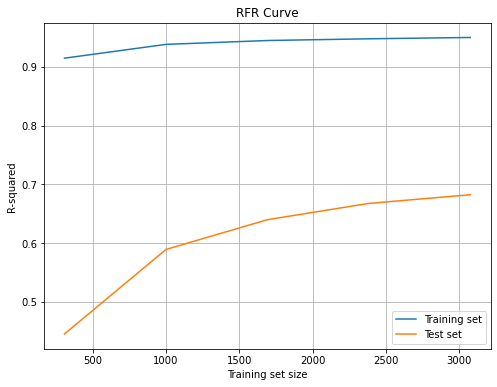

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training set')
plt.plot(train_sizes, test_scores_mean, label='Test set')
plt.xlabel('Training set size')
plt.ylabel('R-squared')
plt.title('RFR Curve')
plt.legend()
plt.grid()
plt.show()

### 2. DECISION TREE REGRESSOR

In [34]:
regressor_d = DecisionTreeRegressor(random_state = 0)

In [46]:
# 5-fold cross-validation on train data
cv_scores_train_d = cross_val_score(regressor_d, x_train, y_train, cv=5)
cv_scores_train_d

array([0.2815564 , 0.31492867, 0.27964026, 0.28943674, 0.33568362])

In [47]:
# 5-fold cross-validation on test data
cv_scores_test_d = cross_val_score(regressor_d, x_test, y_test, cv=5)
cv_scores_test_d

array([0.06811159, 0.10059192, 0.03889355, 0.1704775 , 0.07185868])

In [48]:
print("Mean CV R-squared (Training set):", np.mean(cv_scores_train_d))
print("Mean CV R-squared (Test set):", np.mean(cv_scores_test_d))

Mean CV R-squared (Training set): 0.3002491395682908
Mean CV R-squared (Test set): 0.08998664959053781


In [49]:
# Plot learning curves to visualize overfitting
train_sizes_d, train_scores_d, test_scores_d = learning_curve(regressor_d, x_train, y_train, cv=5, scoring='r2')
train_scores_mean_d = np.mean(train_scores_d, axis=1)
test_scores_mean_d = np.mean(test_scores_d, axis=1)

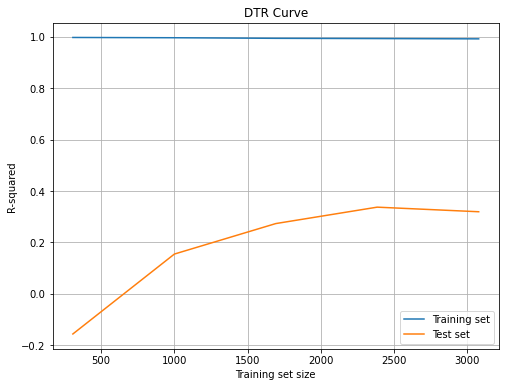

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_d, train_scores_mean_d, label='Training set')
plt.plot(train_sizes_d, test_scores_mean_d, label='Test set')
plt.xlabel('Training set size')
plt.ylabel('R-squared')
plt.title('DTR Curve')
plt.legend()
plt.grid()
plt.show()

### 3. XGBR

In [35]:
xgbr = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [52]:
# 5-fold cross-validation on train data
cv_scores_train_x = cross_val_score(xgbr, x_train, y_train, cv=5)
cv_scores_train_x

[15:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

array([0.63551204, 0.62499282, 0.60402128, 0.64615006, 0.64583478])

In [53]:
# 5-fold cross-validation on test data
cv_scores_test_x = cross_val_score(xgbr, x_test, y_test, cv=5)
cv_scores_test_x

[15:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

array([0.55719191, 0.49646699, 0.40558572, 0.57086247, 0.53733176])

In [54]:
print("Mean CV R-squared (Training set):", np.mean(cv_scores_train_x))
print("Mean CV R-squared (Test set):", np.mean(cv_scores_test_x))

Mean CV R-squared (Training set): 0.6313021965819988
Mean CV R-squared (Test set): 0.5134877709668878


In [55]:
# Plot learning curves to visualize overfitting
train_sizes_x, train_scores_x, test_scores_x = learning_curve(xgbr, x_train, y_train, cv=5, scoring='r2')
train_scores_mean_x = np.mean(train_scores_x, axis=1)
test_scores_mean_x = np.mean(test_scores_x, axis=1)

[15:46:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:46:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

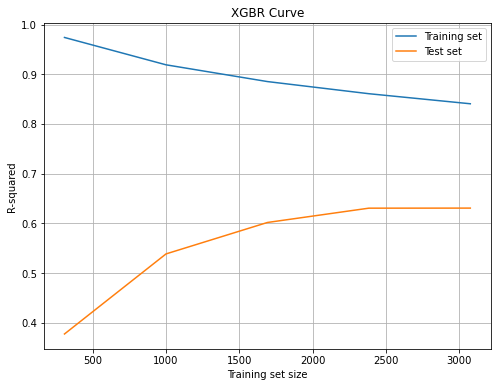

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_x, train_scores_mean_x, label='Training set')
plt.plot(train_sizes_x, test_scores_mean_x, label='Test set')
plt.xlabel('Training set size')
plt.ylabel('R-squared')
plt.title('XGBR Curve')
plt.legend()
plt.grid()
plt.show()

# REFERENCE TEST

###### Fit to model

In [69]:
svrr = SVR(kernel='rbf')

In [75]:
#rfr
regressor.fit(x_train, y_train)   
#scr
svrr.fit(x_train, y_train)

SVR()

###### Prediction

In [76]:
tof = pd.read_csv('tof_ref.csv').drop(columns = ['Unnamed: 0.1','Unnamed: 0','Name'])
tof

,ALogP,ALogp2,AMR,naAromAtom,ATS0e,ATS1e,ATS2e,ATS3e,ATS4e,ATS5e,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-1.9939,3.975637,84.2044,9,329.579068,350.512828,628.250204,821.341404,961.268756,1012.803084,...,10.07538,71.038359,312.169859,7.259764,1171,37,120.0,143.0,7.638889,5.166667


In [77]:
10**(-(regressor.predict(tof[X.columns])))

array([20.18568901])

In [78]:
10**(-(svrr.predict(tof[X.columns])))

array([174.18864227])

# PREDICT ANALOGUES

In [79]:
X.columns

Index(['ALogP', 'ALogp2', 'AMR', 'naAromAtom', 'ATS0e', 'AATS0e', 'ATSC0e',
       'ATSC1e', 'ATSC2e', 'ATSC3e',
       ...
       'JGI2', 'JGI3', 'JGI4', 'JGI5', 'JGI6', 'JGI7', 'JGI8', 'JGI9', 'JGI10',
       'TopoShapeIndex'],
      dtype='object', length=806)

In [80]:
test = pd.read_csv('test_tof_pprdmr.csv').drop(columns='Unnamed: 0')
test

,cid,cmpdname,isosmiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,SRW10.1,TSRW10,MW.1,AMW.1,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,9818231,racemic-Tasocitinib,CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N,0,-1.9939,3.975637,84.2044,48.897860,0,0,...,10.075380,71.038359,312.169859,7.259764,1171,37,120.0,143.0,7.638889,5.166667
1,9836357,"1-[(3S,4R)-4-methyl-3-[methyl(7H-pyrrolo[2,3-d...",C[C@@H]1CCN(C[C@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O)...,0,-1.2637,1.596938,85.7700,50.224653,0,0,...,10.075380,71.038359,311.174610,7.072150,1171,37,120.0,143.0,7.638889,5.166667
2,9857596,"methyl 4-methyl-3-[methyl(7H-pyrrolo[2,3-d]pyr...",CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)OC,0,-1.4103,1.988946,80.5046,47.506653,0,0,...,10.060876,69.911253,303.169525,7.050454,1016,36,116.0,139.0,7.388889,4.916667
3,9880865,"1-[3-[(5-chloro-7H-pyrrolo[2,3-d]pyrimidin-4-y...",CCC(=O)N1CCC(C(C1)N(C)C2=NC=NC3=C2C(=CN3)Cl)C,0,-1.6086,2.587594,88.6207,51.311446,0,0,...,10.144117,71.573242,335.151288,7.447806,1134,39,122.0,147.0,8.250000,5.111111
4,9902531,"N'-cyano-N,N,4-trimethyl-3-[methyl(7H-pyrrolo[...",CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=NC#N)N(C)C,0,-1.5586,2.429234,95.2638,54.723032,0,0,...,10.164120,73.451960,340.212393,6.943110,1457,41,130.0,155.0,8.750000,5.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,168152639,"N-(4-aminobutyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3C(=O)...,0,-3.5039,12.277315,110.3167,70.214583,0,0,...,10.296779,81.645169,462.225850,7.336918,3100002905,50,156.0,184.0,NaN,7.138889
1430,168152640,"3-[(3R,4R)-4-methyl-3-[methyl-[7-(piperazine-1...",C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3C(=O)...,0,-2.5752,6.631655,112.9958,68.880997,0,0,...,10.412381,82.033613,460.210200,7.544430,3100002747,53,164.0,197.0,NaN,6.916667
1431,168152645,"N-(2-aminoethyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3C(=O)...,0,-2.9279,8.572598,104.4935,64.027411,0,0,...,10.279627,79.454831,434.194550,7.617448,2900002317,48,148.0,176.0,NaN,6.638889
1432,168152651,"N-[2-(2-aminoethylamino)-2-oxoethyl]-4-[[(3R,4...",C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3C(=O)...,0,-3.7645,14.171460,116.4970,71.449790,0,0,...,10.343064,83.927293,491.216014,7.675250,3300003509,53,166.0,195.0,NaN,7.555556


In [81]:
test1 = test[X.columns]
test1

,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,ATSC2e,ATSC3e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,-1.9939,3.975637,84.2044,0,329.579068,7.664629,2.496816,-0.111712,0.424600,-0.625336,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
1,-1.2637,1.596938,85.7700,0,333.636412,7.582646,2.325852,-0.061979,0.498368,-0.428637,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
2,-1.4103,1.988946,80.5046,0,331.907096,7.718770,3.134770,-0.154131,1.188321,-0.052566,...,0.098039,0.045139,0.036869,0.031130,0.016599,0.012193,0.009339,0.010070,0.010782,1.000000
3,-1.6086,2.587594,88.6207,0,344.889985,7.664222,2.875863,-0.107702,0.501987,-0.083315,...,0.098765,0.053775,0.037130,0.031901,0.018269,0.011633,0.012534,0.010058,0.008086,1.000000
4,-1.5586,2.429234,95.2638,0,371.044996,7.572347,2.174560,-0.057718,0.605303,-0.013413,...,0.093567,0.051829,0.035528,0.025901,0.021571,0.012992,0.008578,0.008824,0.008775,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,-3.5039,12.277315,110.3167,0,487.015365,7.730403,4.492054,-0.434406,1.221087,-0.639900,...,0.093827,0.049444,0.034233,0.026878,0.017834,0.014081,0.009358,0.008844,0.008407,0.000000
1430,-2.5752,6.631655,112.9958,0,473.578437,7.763581,4.428428,-0.326334,0.816319,-0.725144,...,0.092593,0.050183,0.034188,0.026015,0.015687,0.014059,0.009315,0.008255,0.007202,0.000000
1431,-2.9279,8.572598,104.4935,0,445.060477,7.808079,4.358178,-0.503943,1.072215,-0.740509,...,0.098191,0.051505,0.035660,0.026837,0.018136,0.015603,0.009877,0.009225,0.008222,0.000000
1432,-3.7645,14.171460,116.4970,0,503.850253,7.872660,5.394395,-0.667000,1.242773,-0.811196,...,0.097222,0.049004,0.035314,0.025839,0.018113,0.015125,0.008935,0.008851,0.008210,0.000000


In [82]:
df_t = pd.DataFrame({'cid':[0], 'cmpdname':['tofacitinib']})
df_t

,cid,cmpdname
0,0,tofacitinib


In [83]:
tof1 = pd.concat([df_t,tof[X.columns]],axis = 1)
tof1

,cid,cmpdname,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,0,tofacitinib,-1.9939,3.975637,84.2044,9,329.579068,7.664629,2.496816,-0.111712,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333


In [84]:
test2 = pd.concat([test[['cid','cmpdname']],test1],axis = 1).reset_index(drop = True)
test2

,cid,cmpdname,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,9818231,racemic-Tasocitinib,-1.9939,3.975637,84.2044,0,329.579068,7.664629,2.496816,-0.111712,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
1,9836357,"1-[(3S,4R)-4-methyl-3-[methyl(7H-pyrrolo[2,3-d...",-1.2637,1.596938,85.7700,0,333.636412,7.582646,2.325852,-0.061979,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
2,9857596,"methyl 4-methyl-3-[methyl(7H-pyrrolo[2,3-d]pyr...",-1.4103,1.988946,80.5046,0,331.907096,7.718770,3.134770,-0.154131,...,0.098039,0.045139,0.036869,0.031130,0.016599,0.012193,0.009339,0.010070,0.010782,1.000000
3,9880865,"1-[3-[(5-chloro-7H-pyrrolo[2,3-d]pyrimidin-4-y...",-1.6086,2.587594,88.6207,0,344.889985,7.664222,2.875863,-0.107702,...,0.098765,0.053775,0.037130,0.031901,0.018269,0.011633,0.012534,0.010058,0.008086,1.000000
4,9902531,"N'-cyano-N,N,4-trimethyl-3-[methyl(7H-pyrrolo[...",-1.5586,2.429234,95.2638,0,371.044996,7.572347,2.174560,-0.057718,...,0.093567,0.051829,0.035528,0.025901,0.021571,0.012992,0.008578,0.008824,0.008775,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,168152639,"N-(4-aminobutyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",-3.5039,12.277315,110.3167,0,487.015365,7.730403,4.492054,-0.434406,...,0.093827,0.049444,0.034233,0.026878,0.017834,0.014081,0.009358,0.008844,0.008407,0.000000
1430,168152640,"3-[(3R,4R)-4-methyl-3-[methyl-[7-(piperazine-1...",-2.5752,6.631655,112.9958,0,473.578437,7.763581,4.428428,-0.326334,...,0.092593,0.050183,0.034188,0.026015,0.015687,0.014059,0.009315,0.008255,0.007202,0.000000
1431,168152645,"N-(2-aminoethyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",-2.9279,8.572598,104.4935,0,445.060477,7.808079,4.358178,-0.503943,...,0.098191,0.051505,0.035660,0.026837,0.018136,0.015603,0.009877,0.009225,0.008222,0.000000
1432,168152651,"N-[2-(2-aminoethylamino)-2-oxoethyl]-4-[[(3R,4...",-3.7645,14.171460,116.4970,0,503.850253,7.872660,5.394395,-0.667000,...,0.097222,0.049004,0.035314,0.025839,0.018113,0.015125,0.008935,0.008851,0.008210,0.000000


In [85]:
test2 = pd.concat([test2,tof1]).reset_index(drop = True)
test2

,cid,cmpdname,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,9818231,racemic-Tasocitinib,-1.9939,3.975637,84.2044,0,329.579068,7.664629,2.496816,-0.111712,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
1,9836357,"1-[(3S,4R)-4-methyl-3-[methyl(7H-pyrrolo[2,3-d...",-1.2637,1.596938,85.7700,0,333.636412,7.582646,2.325852,-0.061979,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
2,9857596,"methyl 4-methyl-3-[methyl(7H-pyrrolo[2,3-d]pyr...",-1.4103,1.988946,80.5046,0,331.907096,7.718770,3.134770,-0.154131,...,0.098039,0.045139,0.036869,0.031130,0.016599,0.012193,0.009339,0.010070,0.010782,1.000000
3,9880865,"1-[3-[(5-chloro-7H-pyrrolo[2,3-d]pyrimidin-4-y...",-1.6086,2.587594,88.6207,0,344.889985,7.664222,2.875863,-0.107702,...,0.098765,0.053775,0.037130,0.031901,0.018269,0.011633,0.012534,0.010058,0.008086,1.000000
4,9902531,"N'-cyano-N,N,4-trimethyl-3-[methyl(7H-pyrrolo[...",-1.5586,2.429234,95.2638,0,371.044996,7.572347,2.174560,-0.057718,...,0.093567,0.051829,0.035528,0.025901,0.021571,0.012992,0.008578,0.008824,0.008775,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,168152640,"3-[(3R,4R)-4-methyl-3-[methyl-[7-(piperazine-1...",-2.5752,6.631655,112.9958,0,473.578437,7.763581,4.428428,-0.326334,...,0.092593,0.050183,0.034188,0.026015,0.015687,0.014059,0.009315,0.008255,0.007202,0.000000
1431,168152645,"N-(2-aminoethyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",-2.9279,8.572598,104.4935,0,445.060477,7.808079,4.358178,-0.503943,...,0.098191,0.051505,0.035660,0.026837,0.018136,0.015603,0.009877,0.009225,0.008222,0.000000
1432,168152651,"N-[2-(2-aminoethylamino)-2-oxoethyl]-4-[[(3R,4...",-3.7645,14.171460,116.4970,0,503.850253,7.872660,5.394395,-0.667000,...,0.097222,0.049004,0.035314,0.025839,0.018113,0.015125,0.008935,0.008851,0.008210,0.000000
1433,168152674,"4-[[(3R,4R)-1-(2-cyanoacetyl)-4-methylpiperidi...",-3.0721,9.437798,115.0913,0,507.992809,7.696861,4.552020,-0.335281,...,0.091787,0.048475,0.033562,0.026306,0.017447,0.014490,0.008853,0.008291,0.008206,0.000000


In [90]:
# removing infinit values
test2.replace([np.inf, -np.inf],np.nan)

,cid,cmpdname,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,9818231,racemic-Tasocitinib,-1.9939,3.975637,84.2044,0,329.579068,7.664629,2.496816,-0.111712,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
1,9836357,"1-[(3S,4R)-4-methyl-3-[methyl(7H-pyrrolo[2,3-d...",-1.2637,1.596938,85.7700,0,333.636412,7.582646,2.325852,-0.061979,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
2,9857596,"methyl 4-methyl-3-[methyl(7H-pyrrolo[2,3-d]pyr...",-1.4103,1.988946,80.5046,0,331.907096,7.718770,3.134770,-0.154131,...,0.098039,0.045139,0.036869,0.031130,0.016599,0.012193,0.009339,0.010070,0.010782,1.000000
3,9880865,"1-[3-[(5-chloro-7H-pyrrolo[2,3-d]pyrimidin-4-y...",-1.6086,2.587594,88.6207,0,344.889985,7.664222,2.875863,-0.107702,...,0.098765,0.053775,0.037130,0.031901,0.018269,0.011633,0.012534,0.010058,0.008086,1.000000
4,9902531,"N'-cyano-N,N,4-trimethyl-3-[methyl(7H-pyrrolo[...",-1.5586,2.429234,95.2638,0,371.044996,7.572347,2.174560,-0.057718,...,0.093567,0.051829,0.035528,0.025901,0.021571,0.012992,0.008578,0.008824,0.008775,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,168152640,"3-[(3R,4R)-4-methyl-3-[methyl-[7-(piperazine-1...",-2.5752,6.631655,112.9958,0,473.578437,7.763581,4.428428,-0.326334,...,0.092593,0.050183,0.034188,0.026015,0.015687,0.014059,0.009315,0.008255,0.007202,0.000000
1431,168152645,"N-(2-aminoethyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",-2.9279,8.572598,104.4935,0,445.060477,7.808079,4.358178,-0.503943,...,0.098191,0.051505,0.035660,0.026837,0.018136,0.015603,0.009877,0.009225,0.008222,0.000000
1432,168152651,"N-[2-(2-aminoethylamino)-2-oxoethyl]-4-[[(3R,4...",-3.7645,14.171460,116.4970,0,503.850253,7.872660,5.394395,-0.667000,...,0.097222,0.049004,0.035314,0.025839,0.018113,0.015125,0.008935,0.008851,0.008210,0.000000
1433,168152674,"4-[[(3R,4R)-1-(2-cyanoacetyl)-4-methylpiperidi...",-3.0721,9.437798,115.0913,0,507.992809,7.696861,4.552020,-0.335281,...,0.091787,0.048475,0.033562,0.026306,0.017447,0.014490,0.008853,0.008291,0.008206,0.000000


In [87]:
for i in test2.columns:
    print(i,'-------',test2[i].isnull().sum())

cid ------- 0
cmpdname ------- 0
ALogP ------- 5
ALogp2 ------- 5
AMR ------- 5
naAromAtom ------- 0
ATS0e ------- 0
AATS0e ------- 0
ATSC0e ------- 0
ATSC1e ------- 0
ATSC2e ------- 0
ATSC3e ------- 0
ATSC4e ------- 0
ATSC5e ------- 0
ATSC6e ------- 0
ATSC7e ------- 0
ATSC8e ------- 0
GATS1e ------- 0
GATS2e ------- 0
GATS3e ------- 0
GATS4e ------- 0
GATS5e ------- 0
GATS6e ------- 0
GATS7e ------- 0
GATS8e ------- 0
VE1_Dze ------- 0
VE3_Dze ------- 0
VR1_Dze ------- 0
SM1_Dzs ------- 0
VE1_Dzs ------- 0
VE3_Dzs ------- 0
VR1_Dzs ------- 0
BCUTw-1l ------- 1
BCUTw-1h ------- 1
nBondsD2 ------- 0
nBondsQ ------- 0
SpMax1_Bhm ------- 35
SpMax2_Bhm ------- 35
SpMax3_Bhm ------- 35
SpMax4_Bhm ------- 35
SpMin1_Bhm ------- 35
SpMin2_Bhm ------- 35
SpMin3_Bhm ------- 35
SpMin4_Bhm ------- 35
SpMin5_Bhm ------- 35
SpMin6_Bhm ------- 35
SpMax1_Bhv ------- 35
SpMax2_Bhv ------- 35
SpMax1_Bhs ------- 35
SpMax2_Bhs ------- 35
SpMax3_Bhs ------- 35
SpMin1_Bhs ------- 35
SCH-3 ------- 1
SCH-4 --

In [91]:
test3 = test2.dropna()
test3

,cid,cmpdname,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,9818231,racemic-Tasocitinib,-1.9939,3.975637,84.2044,0,329.579068,7.664629,2.496816,-0.111712,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
1,9836357,"1-[(3S,4R)-4-methyl-3-[methyl(7H-pyrrolo[2,3-d...",-1.2637,1.596938,85.7700,0,333.636412,7.582646,2.325852,-0.061979,...,0.095238,0.047297,0.034762,0.029122,0.016158,0.014939,0.007691,0.008239,0.006768,0.833333
2,9857596,"methyl 4-methyl-3-[methyl(7H-pyrrolo[2,3-d]pyr...",-1.4103,1.988946,80.5046,0,331.907096,7.718770,3.134770,-0.154131,...,0.098039,0.045139,0.036869,0.031130,0.016599,0.012193,0.009339,0.010070,0.010782,1.000000
3,9880865,"1-[3-[(5-chloro-7H-pyrrolo[2,3-d]pyrimidin-4-y...",-1.6086,2.587594,88.6207,0,344.889985,7.664222,2.875863,-0.107702,...,0.098765,0.053775,0.037130,0.031901,0.018269,0.011633,0.012534,0.010058,0.008086,1.000000
4,9902531,"N'-cyano-N,N,4-trimethyl-3-[methyl(7H-pyrrolo[...",-1.5586,2.429234,95.2638,0,371.044996,7.572347,2.174560,-0.057718,...,0.093567,0.051829,0.035528,0.025901,0.021571,0.012992,0.008578,0.008824,0.008775,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,167974192,"1-[5-(7H-pyrrolo[2,3-d]pyrimidin-4-ylamino)-2-...",-1.5411,2.374989,72.6809,0,325.422544,8.344168,6.418144,-0.520568,...,0.084084,0.055556,0.045333,0.023822,0.016961,0.018105,0.016220,0.013906,0.010782,1.000000
1418,168096993,"[(3R,4R)-1-(2-isocyanoacetyl)-4-methylpiperidi...",-3.6569,13.372918,93.2139,0,399.229864,7.532639,2.663061,-0.021262,...,0.113821,0.058511,0.040249,0.029005,0.022023,0.014518,0.009007,0.006972,0.006768,0.833333
1427,168152632,"N-[2-(2-aminoethylamino)-2-oxoethyl]-4-[[(3R,4...",-3.7645,14.171460,116.4970,0,485.056164,7.823487,4.882910,-0.504899,...,0.097222,0.049004,0.035314,0.025839,0.018113,0.015125,0.008935,0.008851,0.008210,0.900000
1428,168152636,"N-(4-aminobutyl)-4-[[(3R,4R)-1-(2-cyanoacetyl)...",-3.5039,12.277315,110.3167,9,468.221276,7.675759,3.956066,-0.275391,...,0.093827,0.049444,0.034233,0.026878,0.017834,0.014081,0.009358,0.008844,0.008407,1.000000


In [92]:
# standatdise
ss_df = pd.DataFrame(ss.fit_transform(test3.drop(columns = ['cid','cmpdname'])),columns=test3.drop(columns = ['cid','cmpdname']).columns)
ss_df

,ALogP,ALogp2,AMR,naAromAtom,ATS0e,AATS0e,ATSC0e,ATSC1e,ATSC2e,ATSC3e,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,0.347560,-0.518357,-0.203504,-0.038691,-0.421786,-0.094717,-0.397332,0.196407,-0.365820,-0.339352,...,0.479199,-0.166611,-0.027842,0.840126,-0.361819,0.512955,-0.998728,-0.267666,-0.110228,-0.844074
1,1.083290,-1.015622,-0.054980,-0.038691,-0.332537,-0.641176,-0.586237,0.553836,-0.260892,0.001692,...,0.479199,-0.166611,-0.027842,0.840126,-0.361819,0.512955,-0.998728,-0.267666,-0.110228,-0.844074
2,0.935580,-0.933673,-0.554493,-0.038691,-0.370577,0.266152,0.307566,-0.108461,0.720506,0.653739,...,0.731856,-0.436756,0.428924,1.333965,-0.186278,-0.781320,-0.219076,0.585691,1.359996,1.227860
3,0.735778,-0.808526,0.215458,-0.038691,-0.084992,-0.097434,0.021491,0.225227,-0.255744,0.600425,...,0.797359,0.644123,0.485498,1.523487,0.478537,-1.045498,1.292153,0.579733,0.372600,1.227860
4,0.786157,-0.841631,0.845670,-0.038691,0.490339,-0.709823,-0.753404,0.584465,-0.108785,0.721625,...,0.328491,0.400606,0.138352,0.048136,1.792888,-0.404445,-0.579308,0.004608,0.624884,-0.844074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.803789,-0.852971,-1.296705,-0.038691,-0.513217,4.434718,3.935483,-2.742038,5.192087,-0.119335,...,-0.526876,0.866984,2.264121,-0.463076,-0.041861,2.005766,3.036132,2.373608,1.359996,1.227860
1334,-1.328034,1.446136,0.651202,-0.038691,1.110321,-0.974495,-0.213643,0.846469,-0.274264,0.660025,...,2.155362,1.236840,1.161894,0.811300,1.972928,0.314753,-0.376418,-0.858450,-0.110228,-0.844074
1335,-1.436449,1.613071,2.860003,-0.038691,2.998241,0.964138,2.239148,-2.629424,0.837232,-0.637093,...,0.658164,0.047022,0.091958,0.032888,0.416587,0.600876,-0.410332,0.017618,0.417851,-0.015300
1336,-1.173876,1.217102,2.273695,25.845696,2.627925,-0.020536,1.215046,-0.979955,0.819938,-0.357518,...,0.351935,0.102124,-0.142440,0.288396,0.305541,0.108575,-0.209924,0.014212,0.489853,1.227860


In [93]:
regressor.predict(ss_df)

array([-1.85819159, -2.11839542, -2.04262346, ..., -2.18964831,
       -2.04008661, -1.5154874 ])

In [94]:
regressor.predict(ss_df)[1337]

-1.515487401440194

In [95]:
10**(-(-1.515487401440194))

32.770827009418

In [96]:
svrr.predict(ss_df)

array([-1.38221045, -1.49662133, -1.40915147, ..., -1.98355144,
       -2.24101984, -2.24101983])

In [97]:
10**(-(svrr.predict(ss_df)[1337]))

174.18864214229387

# HYPER PARAMETER TUNING

### SVR

In [100]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.004 total time=   6.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.005 total time=   7.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   6.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   6.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.007 total time=   5.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.007 total time=   5.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.002 total time=   6.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.001 total time=   5.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.003 total time=   5.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.004 total time=   5.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.324 total time=   5.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [102]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=10, gamma=0.001)


In [104]:
grid_predictions = grid.predict(x_test)

# print classification report
print(r2_score(y_test, grid_predictions))


0.704053185756411


In [105]:
# reference prediction
grid.predict(tof[X.columns])

array([-2.35659989])

In [108]:
10**(-(-2.35659989))

227.30023775749507

### RFR

In [110]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [113]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

# predict the mode
y_pred = model.predict(x_test)

# performance evaluatio metrics
print(r2_score(y_pred, y_test))


0.4311454762725243


In [114]:
param_grid = {'n_estimators': [25, 50, 100, 150],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9],}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)


In [ ]:
model_grid = RandomForestRegressor(max_depth=9,max_features="log2",max_leaf_nodes=9,n_estimators=25)
model_grid.fit(x_train, y_train)
y_pred_grid = model.predict(x_test)
print(r2_score(y_pred_grid, y_test))


##### Hyperparameter Tuning- RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(RandomForestRegressor(),param_grid)
random_search.fit(x_train, y_train)
print(random_search.best_estimator_)


In [ ]:
model_random = RandomForestRegressor(max_depth=3,max_features='log2',max_leaf_nodes=6,n_estimators=100)
model_random.fit(x_train, y_train)
y_pred_rand = model.predict(x_test)
print(r2_score(y_pred_rand, y_test))
